<a href="https://colab.research.google.com/github/sama-squareshift/chicago-taxi-trips/blob/main/chicago_taxi_trips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
# PART 1: DATA EXPLORATION AND VISUALIZATION

# Data setup: BigQuery dataset in my GCP poject

from google.cloud import bigquery

project_id = 'chicago-taxi-trips-427817'
client = bigquery.Client(project=project_id)

query = """
    SELECT *
    FROM `chicago-taxi-trips-427817.chicago_taxi_trips.taxi_trips`
    TABLESAMPLE SYSTEM (5 PERCENT)
    WHERE trip_start_timestamp >= '2023-01-01' AND trip_start_timestamp < '2024-01-01'
"""

# Run the query
query_job = client.query(query)
results = query_job.result()

# Export to CSV
with open('filtered_taxi_data.csv', 'w') as f:
    for row in results:
        f.write(','.join([str(cell) for cell in row]) + '\n')

print('Data exported to filtered_taxi_data.csv')

Data exported to filtered_taxi_data.csv


In [ ]:
# Storing sample data into a Pandas dataframe

import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

# Read in the CSV data
df = pd.read_csv('filtered_taxi_data.csv', header=None, quotechar='"', escapechar='\\',
                 on_bad_lines='skip', low_memory=False)

# Assign column names
column_names = [
    'unique_key', 'taxi_id', 'trip_start_timestamp', 'trip_end_timestamp',
    'trip_seconds', 'trip_miles', 'pickup_census_tract', 'dropoff_census_tract',
    'pickup_community_area', 'dropoff_community_area', 'fare', 'tips', 'tolls',
    'extras', 'trip_total', 'payment_type', 'company', 'pickup_latitude',
    'pickup_longitude', 'pickup_location', 'dropoff_latitude', 'dropoff_longitude',
    'dropoff_location'
]

df.columns = column_names[:len(df.columns)]

# Convert timestamp to datetime
df['trip_start_timestamp'] = pd.to_datetime(df['trip_start_timestamp'])

# Extract hour from timestamp
df['hour'] = df['trip_start_timestamp'].dt.hour

# Remove rows with missing values
df = df.dropna(subset=['hour', 'tips'])

# Convert tips to float
df['tips'] = df['tips'].astype(float)

# Dataset properties and important values (mean, outliers, etc.)

# Dataframe Descriptive Statistics (count, meant, std, minn, max, 25%, 50%, 75%)

print("\nBasic Features Descriptive Statistics:")
print(df.describe())



Basic Features Descriptive Statistics:
       trip_seconds   trip_miles  pickup_census_tract  dropoff_census_tract  \
count   3107.000000  3107.000000         4.260000e+02          3.820000e+02   
mean    1170.347924     6.170068         1.703146e+10          1.703141e+10   
std     1054.625514     6.404169         3.753229e+05          3.528692e+05   
min        0.000000     0.000000         1.703103e+10          1.703103e+10   
25%      483.000000     0.940000         1.703108e+10          1.703108e+10   
50%      975.000000     3.890000         1.703132e+10          1.703128e+10   
75%     1603.000000    10.690000         1.703184e+10          1.703184e+10   
max    21550.000000    85.910000         1.703198e+10          1.703198e+10   

       pickup_community_area  dropoff_community_area         fare  \
count            3046.000000             2848.000000  3107.000000   
mean               30.918910               26.503862    21.622343   
std                25.124485             

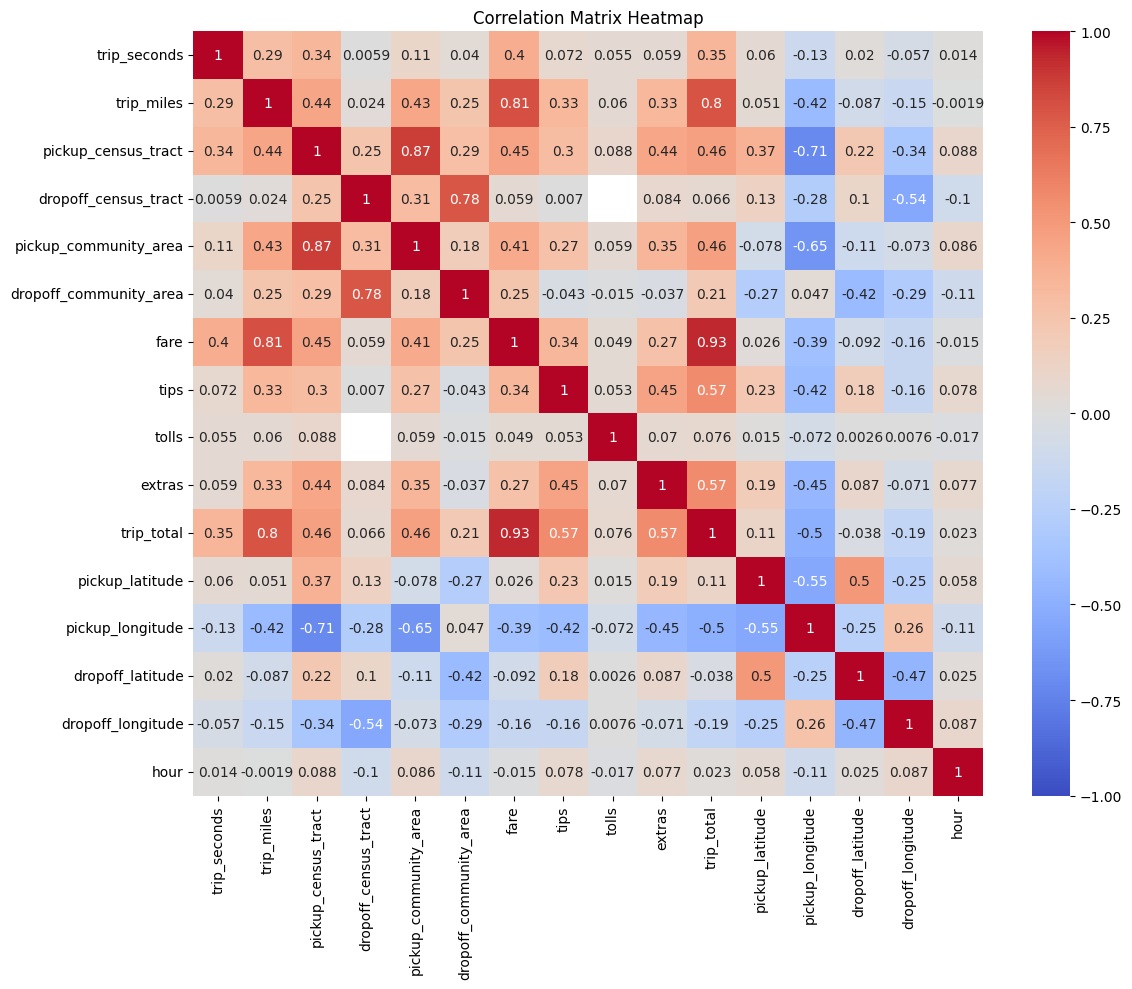

In [ ]:
# Correlation Heat Map

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

# Read the CSV data with a more flexible approach
df = pd.read_csv('filtered_taxi_data.csv', header=None, quotechar='"', escapechar='\\',
                 on_bad_lines='skip', low_memory=False)

# Assign column names
column_names = [
    'unique_key', 'taxi_id', 'trip_start_timestamp', 'trip_end_timestamp',
    'trip_seconds', 'trip_miles', 'pickup_census_tract', 'dropoff_census_tract',
    'pickup_community_area', 'dropoff_community_area', 'fare', 'tips', 'tolls',
    'extras', 'trip_total', 'payment_type', 'company', 'pickup_latitude',
    'pickup_longitude', 'pickup_location', 'dropoff_latitude', 'dropoff_longitude',
    'dropoff_location'
]

df.columns = column_names[:len(df.columns)]

# Convert timestamp to datetime
df['trip_start_timestamp'] = pd.to_datetime(df['trip_start_timestamp'])

# Extract hour from timestamp
df['hour'] = df['trip_start_timestamp'].dt.hour

# Remove rows with missing values
df = df.dropna(subset=['hour', 'tips'])

# Convert tips to float
df['tips'] = df['tips'].astype(float)



# Correlation Heat Map


# Select numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

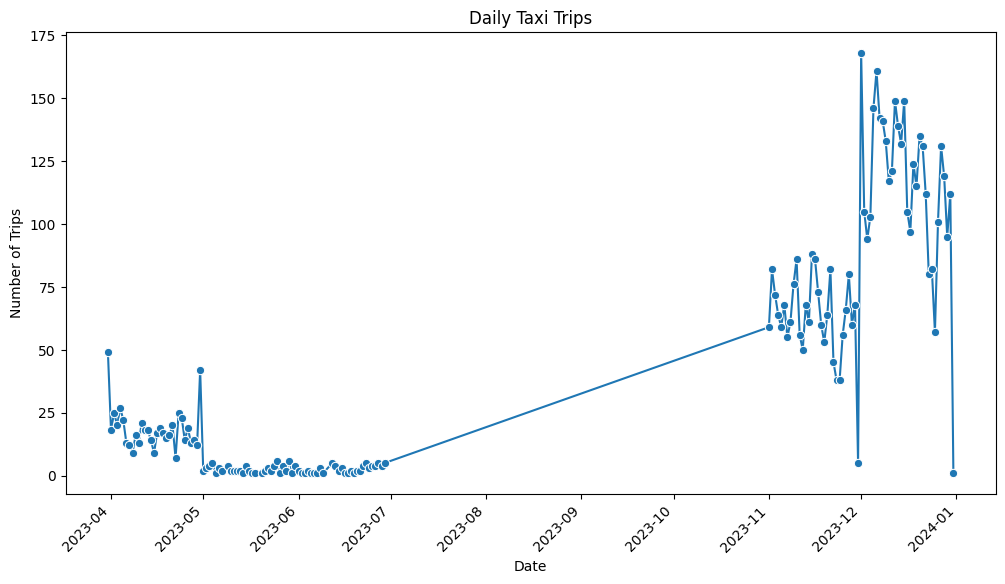

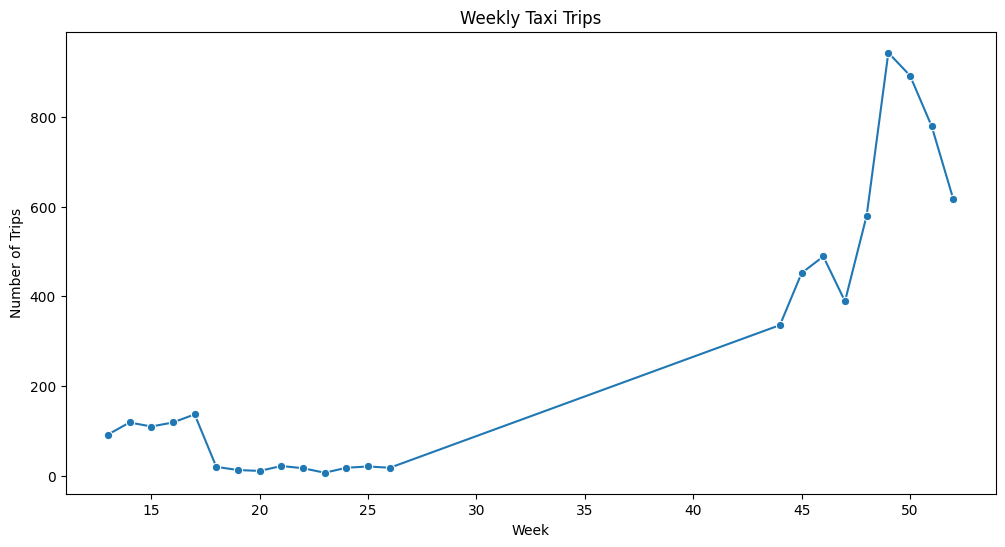

<ipython-input-6-0b82749e0f35>:60: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_trips = df['trip_start_timestamp'].dt.to_period('M').value_counts().sort_index()


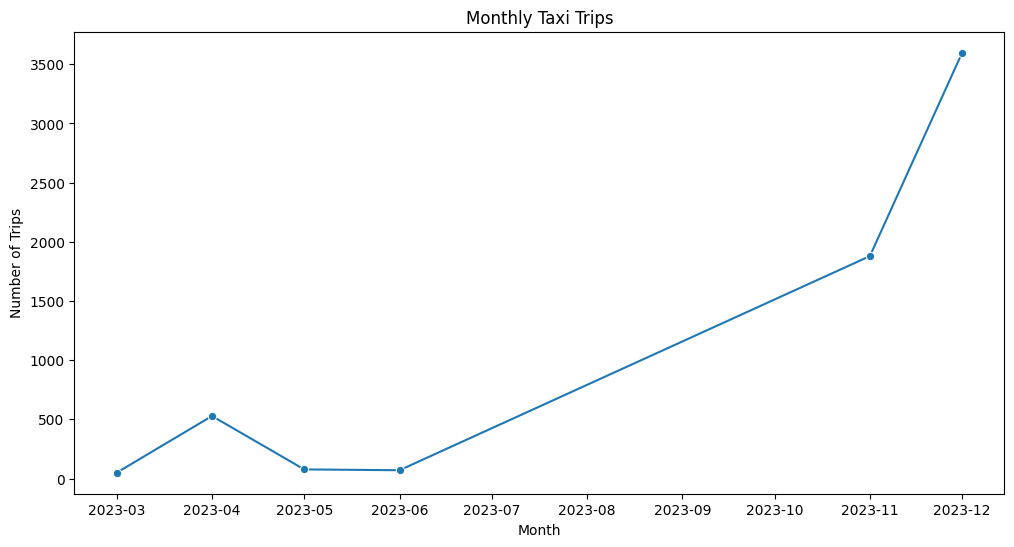

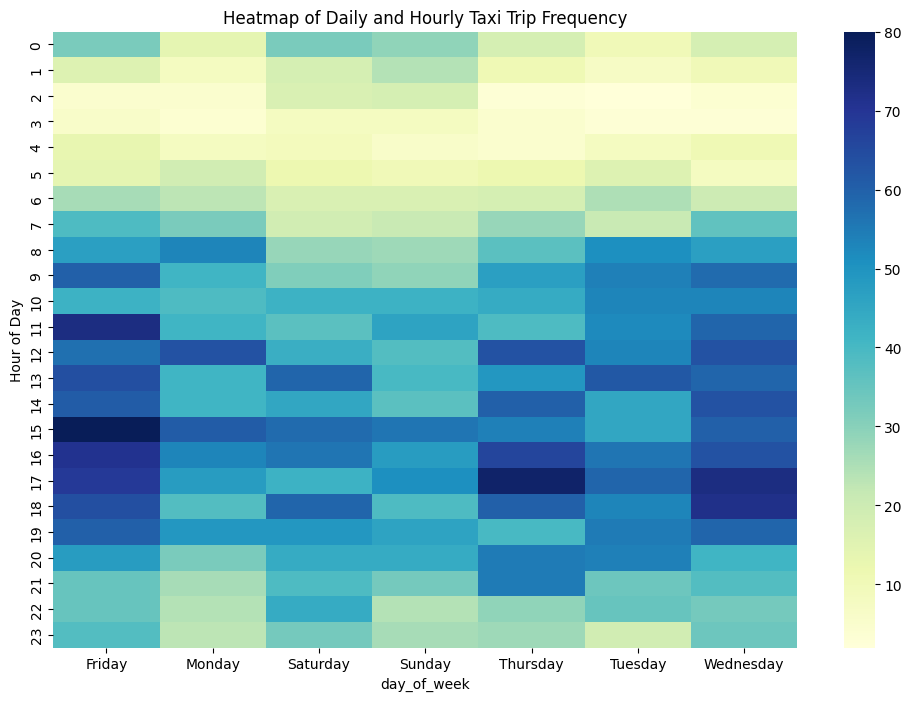

In [ ]:
# Daily, Weekly, and Monthly line plots and a daily heatmap of trips taken

import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

# Read the CSV data with a more flexible approach
df = pd.read_csv('filtered_taxi_data.csv', header=None, quotechar='"', escapechar='\\',
                 on_bad_lines='skip', low_memory=False)

# Assign column names
column_names = [
    'unique_key', 'taxi_id', 'trip_start_timestamp', 'trip_end_timestamp',
    'trip_seconds', 'trip_miles', 'pickup_census_tract', 'dropoff_census_tract',
    'pickup_community_area', 'dropoff_community_area', 'fare', 'tips', 'tolls',
    'extras', 'trip_total', 'payment_type', 'company', 'pickup_latitude',
    'pickup_longitude', 'pickup_location', 'dropoff_latitude', 'dropoff_longitude',
    'dropoff_location'
]

df.columns = column_names[:len(df.columns)]

# Convert timestamp to datetime
df['trip_start_timestamp'] = pd.to_datetime(df['trip_start_timestamp'])

# Extract hour from timestamp
df['hour'] = df['trip_start_timestamp'].dt.hour

# Remove rows with missing values
df = df.dropna(subset=['hour', 'tips'])

# Convert tips to float
df['tips'] = df['tips'].astype(float)


# Trip line plots


# Daily Trips
daily_trips = df['trip_start_timestamp'].dt.date.value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_trips.index, y=daily_trips.values, marker='o')
plt.title('Daily Taxi Trips')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45, ha='right')
plt.show()

# Weekly Trips
weekly_trips = df['trip_start_timestamp'].dt.isocalendar().week.value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=weekly_trips.index, y=weekly_trips.values, marker='o')
plt.title('Weekly Taxi Trips')
plt.xlabel('Week')
plt.ylabel('Number of Trips')
plt.show()

# Monthly Trips
monthly_trips = df['trip_start_timestamp'].dt.to_period('M').value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_trips.index.to_timestamp(), y=monthly_trips.values, marker='o')
plt.title('Monthly Taxi Trips')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.show()

# Daily Heatmap
df['day_of_week'] = df['trip_start_timestamp'].dt.day_name()
df['hour_of_day'] = df['trip_start_timestamp'].dt.hour

# Create a copy of the relevant columns to avoid the warning
heatmap_df = df[['hour_of_day', 'day_of_week']].copy()
heatmap_data = heatmap_df.pivot_table(index='hour_of_day', columns='day_of_week', aggfunc='size')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Heatmap of Daily and Hourly Taxi Trip Frequency')
plt.ylabel('Hour of Day')
plt.show()

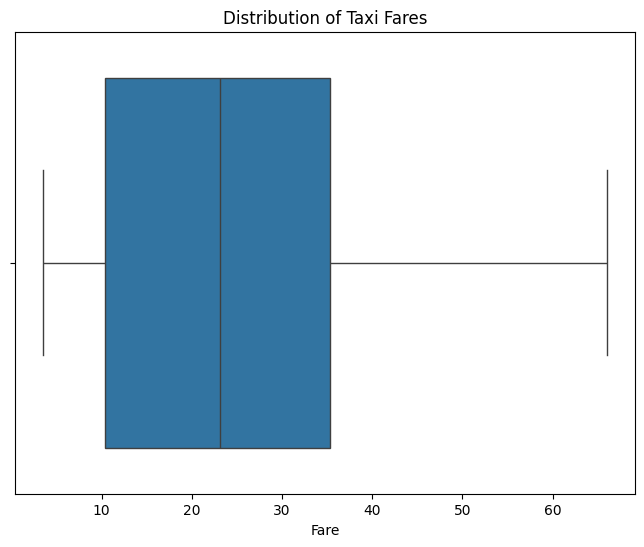

In [ ]:
# Trip Fares Boxplot

import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

# Read the CSV data with a more flexible approach
df = pd.read_csv('filtered_taxi_data.csv', header=None, quotechar='"', escapechar='\\',
                 on_bad_lines='skip', low_memory=False)

# Assign column names
column_names = [
    'unique_key', 'taxi_id', 'trip_start_timestamp', 'trip_end_timestamp',
    'trip_seconds', 'trip_miles', 'pickup_census_tract', 'dropoff_census_tract',
    'pickup_community_area', 'dropoff_community_area', 'fare', 'tips', 'tolls',
    'extras', 'trip_total', 'payment_type', 'company', 'pickup_latitude',
    'pickup_longitude', 'pickup_location', 'dropoff_latitude', 'dropoff_longitude',
    'dropoff_location'
]

df.columns = column_names[:len(df.columns)]

# Convert timestamp to datetime
df['trip_start_timestamp'] = pd.to_datetime(df['trip_start_timestamp'])

# Extract hour from timestamp
df['hour'] = df['trip_start_timestamp'].dt.hour

# Remove rows with missing values
df = df.dropna(subset=['hour', 'tips'])

# Convert tips to float
df['tips'] = df['tips'].astype(float)


# Trip Fares Boxplot


plt.figure(figsize=(8, 6))
sns.boxplot(x=df['fare'])
plt.title('Distribution of Taxi Fares')
plt.xlabel('Fare')
plt.show()



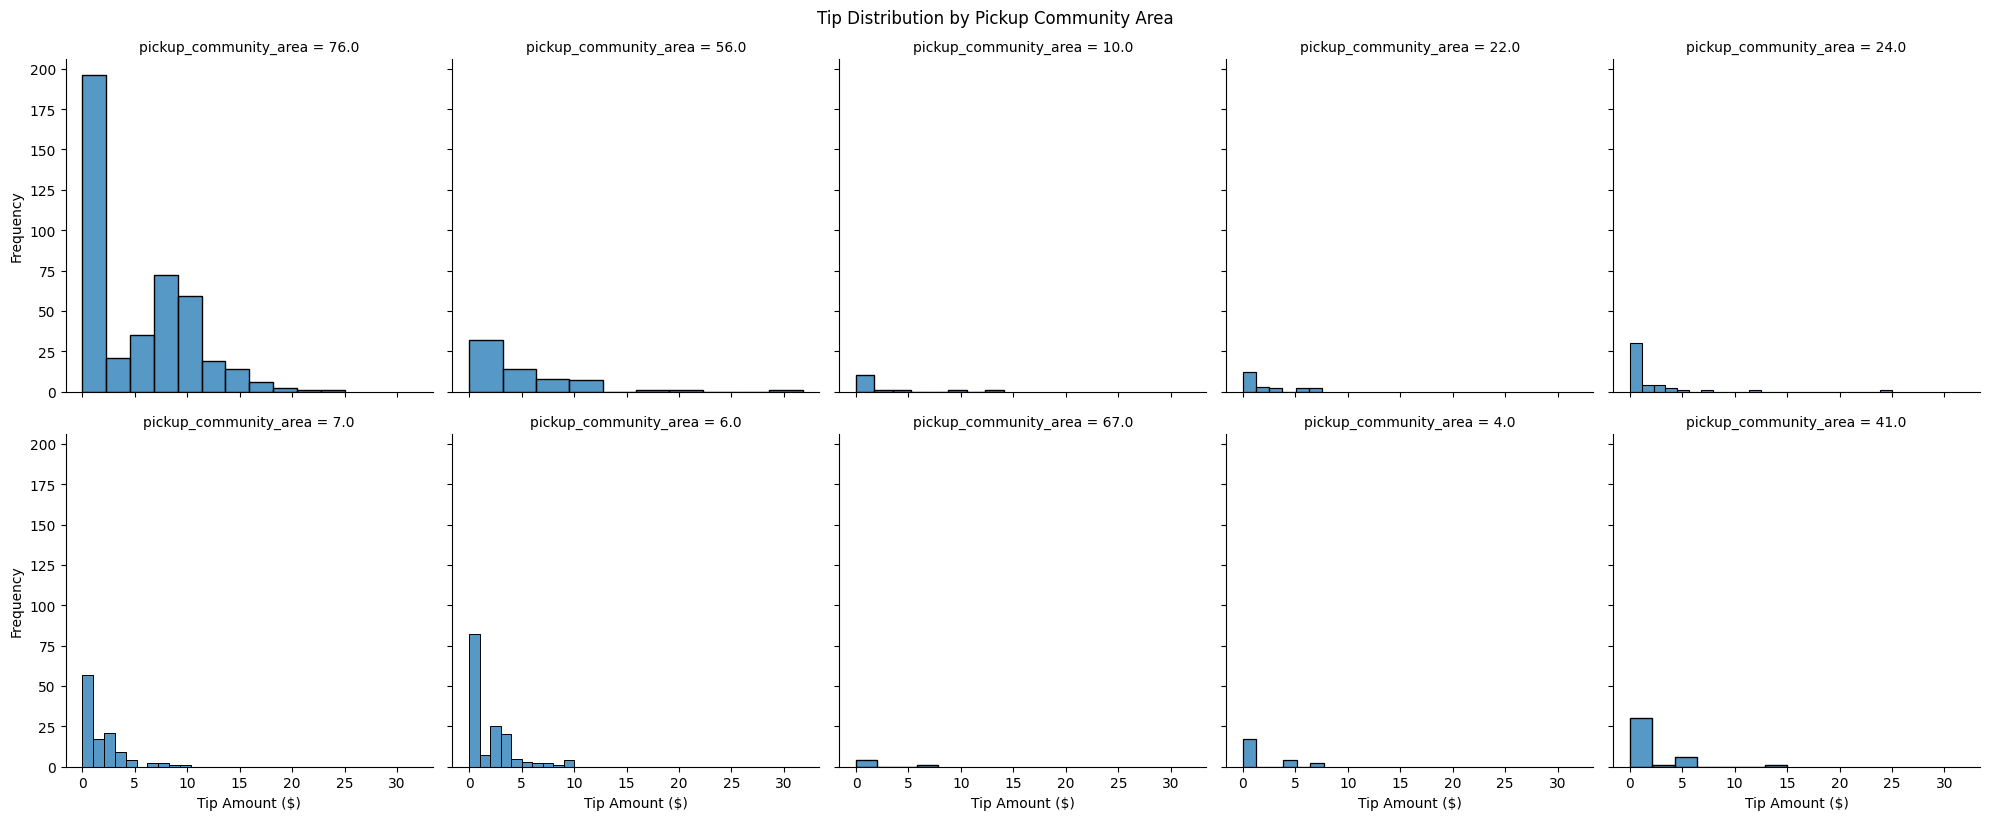

In [ ]:
# Using faceting to show how tip amounts vary across different pickup community areas

import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

# Read the CSV data with a more flexible approach
df = pd.read_csv('filtered_taxi_data.csv', header=None, quotechar='"', escapechar='\\',
                 on_bad_lines='skip', low_memory=False)

# Assign column names
column_names = [
    'unique_key', 'taxi_id', 'trip_start_timestamp', 'trip_end_timestamp',
    'trip_seconds', 'trip_miles', 'pickup_census_tract', 'dropoff_census_tract',
    'pickup_community_area', 'dropoff_community_area', 'fare', 'tips', 'tolls',
    'extras', 'trip_total', 'payment_type', 'company', 'pickup_latitude',
    'pickup_longitude', 'pickup_location', 'dropoff_latitude', 'dropoff_longitude',
    'dropoff_location'
]

df.columns = column_names[:len(df.columns)]

# Convert timestamp to datetime
df['trip_start_timestamp'] = pd.to_datetime(df['trip_start_timestamp'])

# Extract hour from timestamp
df['hour'] = df['trip_start_timestamp'].dt.hour

# Remove rows with missing values
df = df.dropna(subset=['hour', 'tips'])

# Convert tips to float
df['tips'] = df['tips'].astype(float)



# Create faceting plots


# Select top community areas and sort by average tip
top_pickup_communities = df.groupby('pickup_community_area')['tips'].mean().sort_values(ascending=False).head(10).index

# Filter the dataset for those communities
filtered_df = df[df['pickup_community_area'].isin(top_pickup_communities)]

# Create a faceted grid of histograms, explicitly specifying the order
grid = sns.FacetGrid(filtered_df, col="pickup_community_area", col_wrap=5, height=4, col_order=top_pickup_communities)
grid.map(sns.histplot, "tips")

# Add titles and labels
grid.fig.suptitle('Tip Distribution by Pickup Community Area', y=1.02)
grid.set_axis_labels("Tip Amount ($)", "Frequency")
plt.show()



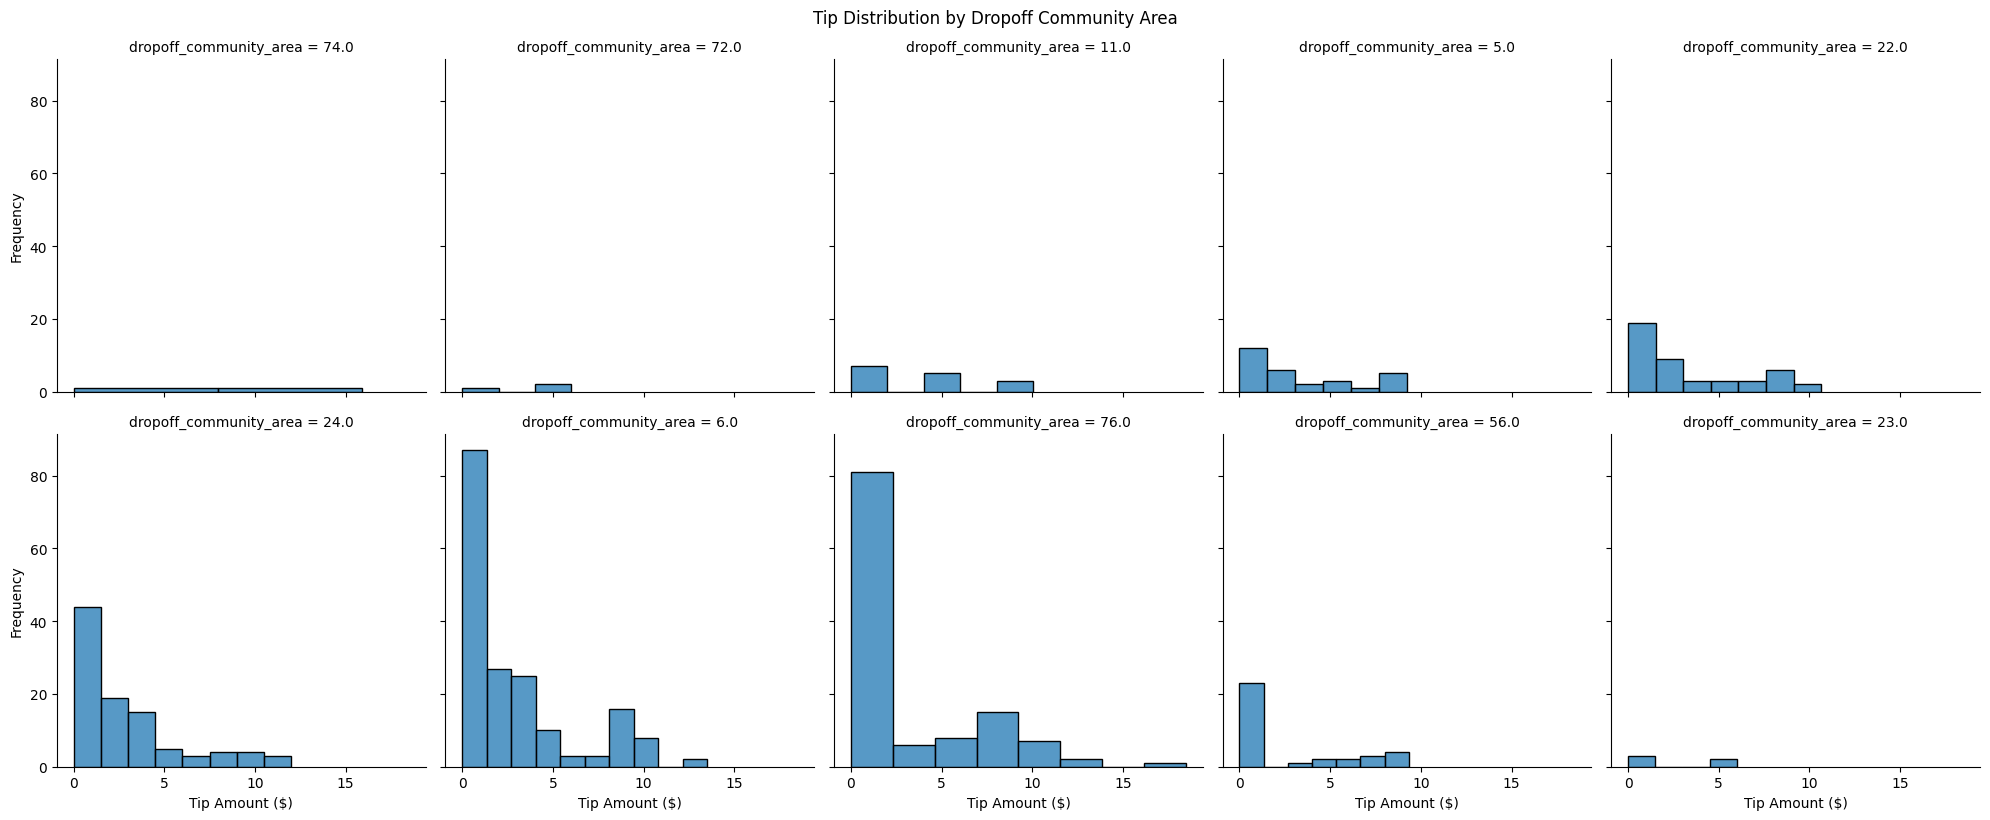

In [ ]:
# Using faceting to show how tip amounts vary across different dropoff community areas

import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

# Read the CSV data with a more flexible approach
df = pd.read_csv('filtered_taxi_data.csv', header=None, quotechar='"', escapechar='\\',
                 on_bad_lines='skip', low_memory=False)

# Assign column names
column_names = [
    'unique_key', 'taxi_id', 'trip_start_timestamp', 'trip_end_timestamp',
    'trip_seconds', 'trip_miles', 'pickup_census_tract', 'dropoff_census_tract',
    'pickup_community_area', 'dropoff_community_area', 'fare', 'tips', 'tolls',
    'extras', 'trip_total', 'payment_type', 'company', 'pickup_latitude',
    'pickup_longitude', 'pickup_location', 'dropoff_latitude', 'dropoff_longitude',
    'dropoff_location'
]

df.columns = column_names[:len(df.columns)]

# Convert timestamp to datetime
df['trip_start_timestamp'] = pd.to_datetime(df['trip_start_timestamp'])

# Extract hour from timestamp
df['hour'] = df['trip_start_timestamp'].dt.hour

# Remove rows with missing values
df = df.dropna(subset=['hour', 'tips'])

# Convert tips to float
df['tips'] = df['tips'].astype(float)



# Create faceting plots


# Select top community areas and sort by average tip
top_dropoff_communities = df.groupby('dropoff_community_area')['tips'].mean().sort_values(ascending=False).head(10).index

# Filter the dataset for those communities
filtered_df = df[df['dropoff_community_area'].isin(top_dropoff_communities)]

# Create a faceted grid of histograms, explicitly specifying the order
grid = sns.FacetGrid(filtered_df, col="dropoff_community_area", col_wrap=5, height=4, col_order=top_dropoff_communities)
grid.map(sns.histplot, "tips")

# Add titles and labels
grid.fig.suptitle('Tip Distribution by Dropoff Community Area', y=1.02)
grid.set_axis_labels("Tip Amount ($)", "Frequency")
plt.show()



In [ ]:
# Scatterplot of Tips vs. Fare

import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

# Read the CSV data with a more flexible approach
df = pd.read_csv('filtered_taxi_data.csv', header=None, quotechar='"', escapechar='\\',
                 on_bad_lines='skip', low_memory=False)

# Assign column names
column_names = [
    'unique_key', 'taxi_id', 'trip_start_timestamp', 'trip_end_timestamp',
    'trip_seconds', 'trip_miles', 'pickup_census_tract', 'dropoff_census_tract',
    'pickup_community_area', 'dropoff_community_area', 'fare', 'tips', 'tolls',
    'extras', 'trip_total', 'payment_type', 'company', 'pickup_latitude',
    'pickup_longitude', 'pickup_location', 'dropoff_latitude', 'dropoff_longitude',
    'dropoff_location'
]

df.columns = column_names[:len(df.columns)]

# Convert timestamp to datetime
df['trip_start_timestamp'] = pd.to_datetime(df['trip_start_timestamp'])

# Extract hour from timestamp
df['hour'] = df['trip_start_timestamp'].dt.hour

# Remove rows with missing values
df = df.dropna(subset=['hour', 'tips'])

# Convert tips to float
df['tips'] = df['tips'].astype(float)


# Scatterplot

plt.figure(figsize=(10, 6))
sns.scatterplot(x='fare', y='tips', data=df, alpha=0.5)  # alpha for transparency
plt.title('Tip Amount vs. Fare')
plt.xlabel('Fare ($)')
plt.ylabel('Tip ($)')
plt.grid(axis='y', linestyle='--')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'filtered_taxi_data.csv'

In [ ]:
# Scatter plot of Fare vs. Miles

import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

# Read the CSV data with a more flexible approach
df = pd.read_csv('filtered_taxi_data.csv', header=None, quotechar='"', escapechar='\\',
                 on_bad_lines='skip', low_memory=False)

# Assign column names
column_names = [
    'unique_key', 'taxi_id', 'trip_start_timestamp', 'trip_end_timestamp',
    'trip_seconds', 'trip_miles', 'pickup_census_tract', 'dropoff_census_tract',
    'pickup_community_area', 'dropoff_community_area', 'fare', 'tips', 'tolls',
    'extras', 'trip_total', 'payment_type', 'company', 'pickup_latitude',
    'pickup_longitude', 'pickup_location', 'dropoff_latitude', 'dropoff_longitude',
    'dropoff_location'
]

df.columns = column_names[:len(df.columns)]

# Convert timestamp to datetime
df['trip_start_timestamp'] = pd.to_datetime(df['trip_start_timestamp'])

# Extract hour from timestamp
df['hour'] = df['trip_start_timestamp'].dt.hour

# Remove rows with missing values
df = df.dropna(subset=['hour', 'tips'])

# Convert tips to float
df['tips'] = df['tips'].astype(float)


# Scatterplot

plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_miles', y='fare', data=df, alpha=0.5)
plt.title('Fare vs. Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare ($)')
plt.grid(axis='y', linestyle='--')
plt.show()

<ipython-input-4-423d13c438eb>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].clip(lower, upper)
<ipython-input-4-423d13c438eb>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].clip(lower, upper)
<ipython-input-4-423d13c438eb>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

trip_miles                0
fare                      0
trip_total                0
trip_seconds              0
pickup_community_area     0
dropoff_community_area    0
trip_duration_minutes     0
dtype: int64


<Figure size 1200x1200 with 0 Axes>

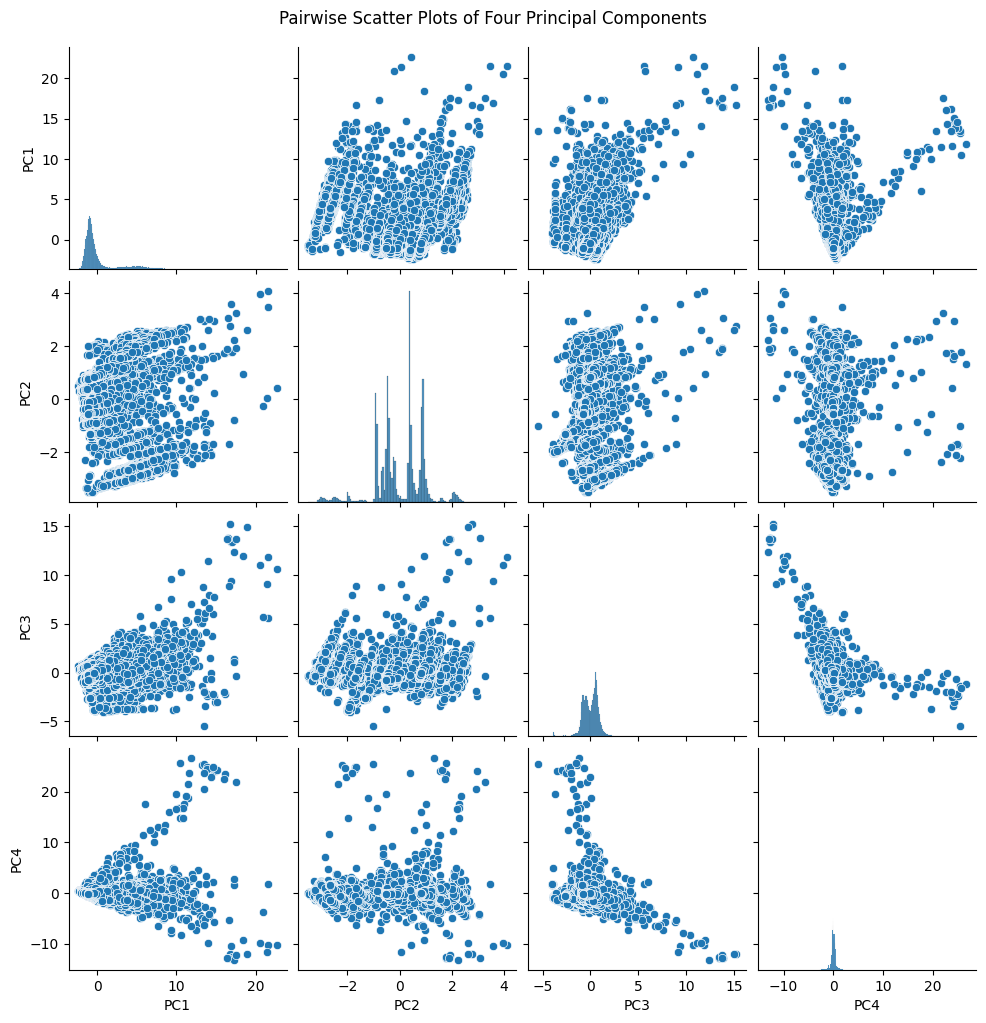

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


911/911 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 4.9662 - val_loss: 3.7367
Epoch 2/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3.9548 - val_loss: 3.7073
Epoch 3/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.8920 - val_loss: 3.6741
Epoch 4/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.9156 - val_loss: 3.6986
Epoch 5/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.8318 - val_loss: 3.6428
Epoch 6/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3.7725 - val_loss: 3.6626
Epoch 7/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 3.8300 - val_loss: 3.6080
Epoch 8/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.7410 - val_loss: 3.6327
Epoch 9/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.9184 - val_loss: 3.6121
Epoch 10/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.7474 - val_loss: 3.6014
Epoch 11/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.7163 - val_loss: 3.5714
Epoch 12/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 3.

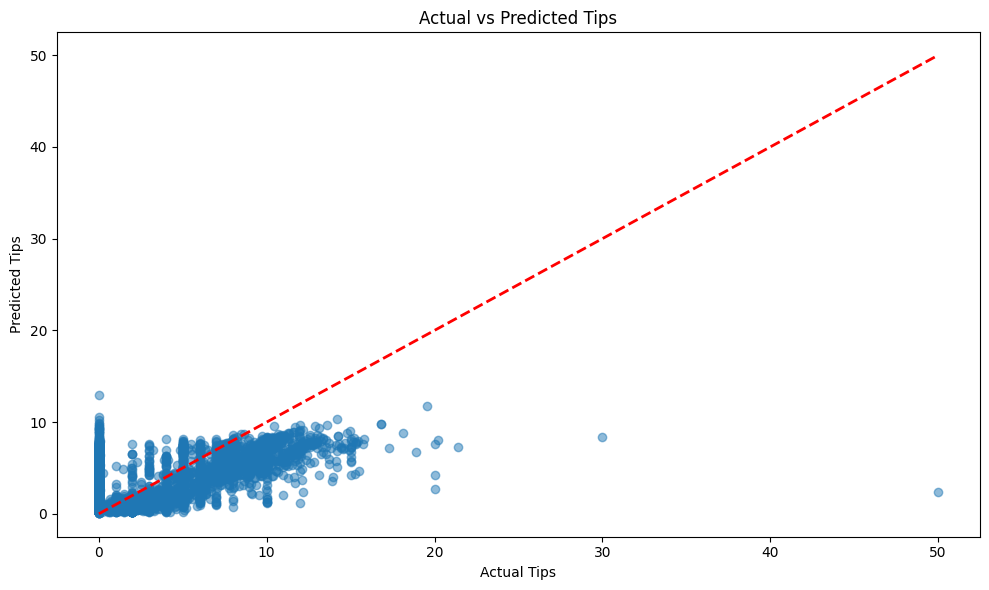

Mean Squared Error: 3.4744
Mean Absolute Error: 1.2727
Root Mean Squared Error: 1.8640
R-squared Score: 0.5039
Predictions within 40% of actual: 7.21%
Predictions within 50% of actual: 10.69%


In [ ]:
# PART 2: FEATURE ENGINEERING

# Directly accessing BigQuery dataset, not csv file

import pandas as pd
from google.cloud import bigquery
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

project_id = 'chicago-taxi-trips-427817'
dataset_id = 'chicago_taxi_trips'
table_id = 'taxi_trips'

# Construct a reference to the table
table_ref = bigquery.TableReference.from_string(f"{project_id}.{dataset_id}.{table_id}")

# Create a BigQuery client
client = bigquery.Client(project=project_id)

# Query to select a random sample
sample_percentage = 0.1  # 1% sample
query = f"""
    SELECT *
    FROM `{project_id}.{dataset_id}.{table_id}`
    WHERE RAND() < {sample_percentage / 100}
"""

# Read the sampled data into a DataFrame
df = client.query(query).to_dataframe()

df = df.copy()

#-------

# Data Cleaning and Feature transformation/engineering

# Scale large value columns pickup and dropoff census tracts
scaler = MinMaxScaler()
df[['pickup_census_tract', 'dropoff_census_tract']] = scaler.fit_transform(df[['pickup_census_tract', 'dropoff_census_tract']])

# Scaling continued
def cap_extreme_values(df, columns, lower_percentile=0.0001, upper_percentile=0.9999):
    for col in columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            lower = df[col].quantile(lower_percentile)
            upper = df[col].quantile(upper_percentile)

            if pd.api.types.is_integer_dtype(df[col]):
                lower = int(lower)
                upper = int(upper)
                df[col] = df[col].clip(lower, upper).astype('Int64')
            else:
                df[col] = df[col].clip(lower, upper)
    return df

# Convert to correct data types
df['trip_start_timestamp'] = pd.to_datetime(df['trip_start_timestamp'])
df['trip_end_timestamp'] = pd.to_datetime(df['trip_end_timestamp'])
df['pickup_community_area'] = df['pickup_community_area'].astype(float)
df['dropoff_community_area'] = df['dropoff_community_area'].astype(float)

# Feature construction - making new features based on existing data
df['trip_duration_minutes'] = df['trip_seconds'] / 60

df = df.dropna()


#-------

# Using PCA for Feature Extraction

# Separate numeric features and entity ids
numeric_features = ['trip_miles', 'fare', 'trip_total', 'trip_seconds', 'pickup_community_area', 'dropoff_community_area', 'trip_duration_minutes']
entity_id_columns = ['taxi_id', 'unique_key']

df = cap_extreme_values(df, numeric_features) # cap extreme values

X = df[numeric_features]

# Check for any remaining null values
print(X.isnull().sum())

# Standardize
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_std)


# # Explained variance ratio
# print("Explained variance ratio:", pca.explained_variance_ratio_)
# print("Cumulative explained variance ratio:", np.cumsum(pca.explained_variance_ratio_))

# # Visualize the first two principal components to help visualize the main patterns in the data
# plt.figure(figsize=(10, 8))
# plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.3)
# plt.xlabel('First Principal Component')
# plt.ylabel('Second Principal Component')
# plt.title('PCA of Taxi Trips (First Two Components)')
# plt.show()

# # Visualize the explained variance ratio
# plt.figure(figsize=(10, 6))
# plt.bar(range(1, 5), pca.explained_variance_ratio_)
# plt.xlabel('Principal Component')
# plt.ylabel('Explained Variance Ratio')
# plt.title('Explained Variance Ratio by Principal Component')
# plt.xticks(range(1, 5))
# plt.show()

# Pairwise scatter plots for all four components to show how each principal component relates to the others
plt.figure(figsize=(12, 12))
sns.pairplot(pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4']))
plt.suptitle('Pairwise Scatter Plots of Four Principal Components', y=1.02)
plt.show()

# PART 4: MODEL TRAINING AND EVALUATION

################## TENSOR FLOW MODEL ##################


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
import numpy as np

# Prepare the features and target (renamed for comprehension)
features = ['trip_miles', 'fare', 'trip_total', 'trip_seconds', 'pickup_community_area',
            'dropoff_community_area', 'trip_duration_minutes']
# X = df[features]
X = X_pca # Use PCA transformed features for models
y = df['tips']

# Perform all feature engineering and scaling before model training
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Keras Sequential Neural Network ---------

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer
])


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)


# Evaluate the model:

# Make predictions
y_pred = model.predict(X_test_scaled)

# For the sequential model only:
y_pred_flat = y_pred.flatten()
y_test = y_test.values if isinstance(y_test, (pd.DataFrame, pd.Series)) else y_test

# Visualize actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Tips')
plt.ylabel('Predicted Tips')
plt.title('Actual vs Predicted Tips')
plt.tight_layout()
plt.show()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R-squared Score: {r2:.4f}")

# Evaluate accuracy of y_pred against y_test
def custom_accuracy(y_true, y_pred_flat, tolerance_percentage=10):
    """
    Calculate the percentage of predictions that are within a certain percentage of the true value.

    Args:
    y_true: array-like of true values
    y_pred: array-like of predicted values
    tolerance_percentage: the percentage tolerance for a prediction to be considered correct

    Returns:
    float: the percentage of predictions within the tolerance
    """
    tolerance = tolerance_percentage / 100.0
    within_tolerance = np.abs(y_true - y_pred_flat) <= (tolerance * np.abs(y_true))
    return np.mean(within_tolerance) * 100

# Use the function
accuracy_40percent = custom_accuracy(y_test, y_pred, tolerance_percentage=40)
accuracy_50percent = custom_accuracy(y_test, y_pred, tolerance_percentage=50)

print(f"Predictions within 40% of actual: {accuracy_40percent:.2f}%")
print(f"Predictions within 50% of actual: {accuracy_50percent:.2f}%")



# end sequential NN model -----------


# Start Gradient Boost Model ----------

# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# # Create and train the Gradient Boosting model
# gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
# gb_model.fit(X_train_scaled, y_train)

# # Make predictions
# y_pred = gb_model.predict(X_test_scaled)

# # Visualize actual vs predicted values
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_pred, alpha=0.5)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
# plt.xlabel('Actual Tips')
# plt.ylabel('Predicted Tips')
# plt.title('Actual vs Predicted Tips')
# plt.tight_layout()
# plt.show()

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error: {mse:.4f}")
# print(f"Mean Absolute Error: {mae:.4f}")
# print(f"Root Mean Squared Error: {rmse:.4f}")
# print(f"R-squared Score: {r2:.4f}")

# # Evaluate accuracy of y_pred against y_test
# def custom_accuracy(y_true, y_pred, tolerance_percentage=10):
#     """
#     Calculate the percentage of predictions that are within a certain percentage of the true value.

#     Args:
#     y_true: array-like of true values
#     y_pred: array-like of predicted values
#     tolerance_percentage: the percentage tolerance for a prediction to be considered correct

#     Returns:
#     float: the percentage of predictions within the tolerance
#     """
#     tolerance = tolerance_percentage / 100.0
#     within_tolerance = np.abs(y_true - y_pred) <= (tolerance * np.abs(y_true))
#     return np.mean(within_tolerance) * 100

# # Use the function
# accuracy_40percent = custom_accuracy(y_test, y_pred, tolerance_percentage=40)
# accuracy_50percent = custom_accuracy(y_test, y_pred, tolerance_percentage=50)

# print(f"Predictions within 40% of actual: {accuracy_40percent:.2f}%")
# print(f"Predictions within 50% of actual: {accuracy_50percent:.2f}%")

# End gradient boost model -------

# Start Support Vector Regression model ------------

# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVR

# # Create and train the SVR model
# # Use GridSearchCV to find the best hyperparameters
# # param_grid = {
# #     'C': [0.1, 1, 10, 100],
# #     'epsilon': [0.1, 0.2, 0.5, 1.0],
# #     'kernel': ['rbf', 'linear']
# # }

# # svr = SVR()
# # grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# # grid_search.fit(X_train_scaled, y_train)

# # # Get the best model
# # best_svr = grid_search.best_estimator_

# # print("Best parameters:", grid_search.best_params_)

# # # Make predictions
# # y_pred = best_svr.predict(X_test_scaled)

# # without gridsearchcv:

# # Create and train the SVR model
# svr = SVR(C=1.0, epsilon=0.1, kernel='rbf')  # These values can be adjusted
# svr.fit(X_train_scaled, y_train)

# # Make predictions
# y_pred = svr.predict(X_test_scaled)

# # Visualize actual vs predicted values
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_pred, alpha=0.5)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
# plt.xlabel('Actual Tips')
# plt.ylabel('Predicted Tips')
# plt.title('Actual vs Predicted Tips')
# plt.tight_layout()
# plt.show()

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error: {mse:.4f}")
# print(f"Mean Absolute Error: {mae:.4f}")
# print(f"Root Mean Squared Error: {rmse:.4f}")
# print(f"R-squared Score: {r2:.4f}")

# # Evaluate accuracy of y_pred against y_test
# def custom_accuracy(y_true, y_pred, tolerance_percentage=10):
#     """
#     Calculate the percentage of predictions that are within a certain percentage of the true value.

#     Args:
#     y_true: array-like of true values
#     y_pred: array-like of predicted values
#     tolerance_percentage: the percentage tolerance for a prediction to be considered correct

#     Returns:
#     float: the percentage of predictions within the tolerance
#     """
#     tolerance = tolerance_percentage / 100.0
#     within_tolerance = np.abs(y_true - y_pred) <= (tolerance * np.abs(y_true))
#     return np.mean(within_tolerance) * 100

# # Use the function
# accuracy_40percent = custom_accuracy(y_test, y_pred, tolerance_percentage=40)
# accuracy_50percent = custom_accuracy(y_test, y_pred, tolerance_percentage=50)

# print(f"Predictions within 40% of actual: {accuracy_40percent:.2f}%")
# print(f"Predictions within 50% of actual: {accuracy_50percent:.2f}%")

# End support vector regression model ----

# Start Polynomial regression model -----------

# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# from sklearn.linear_model import LinearRegression
# from sklearn.pipeline import make_pipeline
# from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# # Function to create and evaluate polynomial regression model
# def poly_regression(degree):
#     # Create a pipeline that scales, creates polynomial features, then fits a linear regression
#     model = make_pipeline(
#         StandardScaler(),
#         PolynomialFeatures(degree, include_bias=False),
#         LinearRegression()
#     )

#     # Fit the model
#     model.fit(X_train_scaled, y_train)

#     # Make predictions
#     y_pred = model.predict(X_test_scaled)

#     # Calculate metrics
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)

#     # Perform cross-validation
#     cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
#     cv_mse = -cv_scores.mean()

#     return model, mse, r2, cv_mse, y_pred

# # Try different degrees of polynomial features
# degrees = [1, 2, 3, 4]
# results = []

# for degree in degrees:
#     model, mse, r2, cv_mse, y_pred = poly_regression(degree)
#     results.append({
#         'Degree': degree,
#         'Test MSE': mse,
#         'Test R2': r2,
#         'CV MSE': cv_mse
#     })
#     print(f"Degree {degree}:")
#     print(f"  Test MSE: {mse:.4f}")
#     print(f"  Test R2: {r2:.4f}")
#     print(f"  CV MSE: {cv_mse:.4f}")
#     print()

# # Convert results to DataFrame
# results_df = pd.DataFrame(results)

# # Select the best model (you can change the criterion as needed)
# best_degree = results_df.loc[results_df['CV MSE'].idxmin(), 'Degree']
# print(f"Best degree based on CV MSE: {best_degree}")

# # Fit the best model
# best_model, best_mse, best_r2, _, y_pred = poly_regression(best_degree)

# # Visualize actual vs predicted values
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_pred, alpha=0.5)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
# plt.xlabel('Actual Tips')
# plt.ylabel('Predicted Tips')
# plt.title(f'Actual vs Predicted Tips (Polynomial Regression, Degree {best_degree})')
# plt.tight_layout()
# plt.show()

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error: {mse:.4f}")
# print(f"Mean Absolute Error: {mae:.4f}")
# print(f"Root Mean Squared Error: {rmse:.4f}")
# print(f"R-squared Score: {r2:.4f}")

# # Evaluate accuracy of y_pred against y_test
# def custom_accuracy(y_true, y_pred, tolerance_percentage=10):
#     """
#     Calculate the percentage of predictions that are within a certain percentage of the true value.

#     Args:
#     y_true: array-like of true values
#     y_pred: array-like of predicted values
#     tolerance_percentage: the percentage tolerance for a prediction to be considered correct

#     Returns:
#     float: the percentage of predictions within the tolerance
#     """
#     tolerance = tolerance_percentage / 100.0
#     within_tolerance = np.abs(y_true - y_pred) <= (tolerance * np.abs(y_true))
#     return np.mean(within_tolerance) * 100

# accuracy_40percent = custom_accuracy(y_test, y_pred, tolerance_percentage=40)
# accuracy_50percent = custom_accuracy(y_test, y_pred, tolerance_percentage=50)

# print(f"Predictions within 40% of actual: {accuracy_40percent:.2f}%")
# print(f"Predictions within 50% of actual: {accuracy_50percent:.2f}%")

# ------- end Polynomial regression model

################# Commented out feature storage for tensorflow demo 7/30 #################

# # PART 4: FEATURE STORAGE

# Save pca components into Vertex AI Feature Store for model training

#-----

# Create a feature view that uses the default service account and supports embeddings:
# https://cloud.google.com/vertex-ai/docs/featurestore/latest/create-featureview#create_featureview_bq_defaultsa
# Combining BiGuery and PCA with sample feature storage colab: https://colab.research.google.com/github/GoogleCloudPlatform/vertex-ai-samples/blob/main/notebooks/official/feature_store/online_feature_serving_and_fetching_bigquery_data_with_feature_store_bigtable.ipynb#scrollTo=XwY5CYLlBYAB

# from google.cloud import bigquery
# from google.cloud import aiplatform
# import vertexai
# from vertexai.resources.preview import feature_store
# from typing import List

# # Reference Doc: https://cloud.google.com/vertex-ai/docs/featurestore/latest/create-featureview#create_featureview_bq_defaultsa

# # Initialize Vertex AI
# project = 'chicago-taxi-trips-427817'
# location = 'us-central1'

# # Get or create a Bigtable Feature Online Store

# def get_or_create_bigtable_feature_online_store(
#     project: str,
#     location: str,
#     feature_online_store_id: str,
# ):
#     aiplatform.init(project=project, location=location)
#     try:
#         # Try to get the existing FeatureOnlineStore
#         fos = feature_store.FeatureOnlineStore(feature_online_store_id)
#         print(f"Retrieved existing FeatureOnlineStore: {fos.name}")
#     except exceptions.NotFound:
#         # If it doesn't exist, create a new one
#         fos = feature_store.FeatureOnlineStore.create_bigtable_store(
#             feature_online_store_id
#         )
#         print(f"Created new FeatureOnlineStore: {fos.name}")
#     return fos

# feature_online_store_id = "taxi_trip_online_store"
# fos = get_or_create_bigtable_feature_online_store(project, location, feature_online_store_id)

# # Storing PCA into a new table in BigQuery

# def store_pca_and_tips_in_bigquery(pca_df, project_id, dataset_id, table_id):
#     client = bigquery.Client(project=project_id)
#     table_ref = f"{project_id}.{dataset_id}.{table_id}"

#     # Define the schema
#     schema = [
#         bigquery.SchemaField("taxi_id", "STRING"),
#         bigquery.SchemaField("unique_key", "STRING"),
#         bigquery.SchemaField("pca_component_1", "FLOAT"),
#         bigquery.SchemaField("pca_component_2", "FLOAT"),
#         bigquery.SchemaField("pca_component_3", "FLOAT"),
#         bigquery.SchemaField("pca_component_4", "FLOAT"),
#         bigquery.SchemaField("tips", "FLOAT"),  # Add tips to feature store as well
#     ]

#     # Create a new table
#     table = bigquery.Table(table_ref, schema=schema)
#     table = client.create_table(table, exists_ok=True)  # This will create the table if it doesn't exist

#     # Load the data
#     job_config = bigquery.LoadJobConfig()
#     job_config.schema = schema
#     job = client.load_table_from_dataframe(pca_df, table_ref, job_config=job_config)
#     job.result()

#     print(f"PCA results stored in {table_ref}")

# # Function to create feature view from Big Query Source

# # Create dataframe of pca components
# pca_df = pd.DataFrame(
#     X_pca,
#     columns=['pca_component_1', 'pca_component_2', 'pca_component_3', 'pca_component_4']
# )
# # Add the identifiers back to pca_df
# for entity_id_column in entity_id_columns:
#     pca_df[entity_id_columns] = df[entity_id_columns]
# pca_df['tips'] = df['tips']  # Add tip amount back into pca df

# # # Store the PCA results in a new table
# # pca_table_id = 'pca_results'  # New table name
# # store_pca_in_bigquery(pca_df, project, dataset_id, pca_table_id)

# # Store the PCA results and the tips in a new table
# pca_table_id = 'pca_results_with_tips'  # New table name
# store_pca_and_tips_in_bigquery(pca_df, project, dataset_id, pca_table_id)

# bq_table_uri = f"bq://{project}.{dataset_id}.{pca_table_id}"
# # feature_view_id = "taxi_trip_pca_view"
# feature_view_id = "taxi_trip_pca_view_with_tips"

# print(vertexai.__version__)

# # Create a feature view that includes tip amount:
# def create_feature_view_from_bq_source(
#     project: str,
#     location: str,
#     feature_online_store_id: str,
#     feature_view_id: str,
#     bq_table_uri: str,
#     entity_id_columns: List[str],
# ):

#     aiplatform.init(project=project, location=location)

#     fos = feature_store.FeatureOnlineStore(feature_online_store_id)
#     feature_view = fos.create_feature_view(
#         name=feature_view_id,
#         source=feature_store.utils.FeatureViewBigQuerySource(
#             uri=bq_table_uri, entity_id_columns=entity_id_columns
#         ),
#     )
#     return feature_view

# # Create the feature view
# feature_view = create_feature_view_from_bq_source(
#     project=project,
#     location=location,
#     feature_online_store_id=feature_online_store_id,
#     feature_view_id=feature_view_id,
#     bq_table_uri=bq_table_uri,
#     entity_id_columns=["taxi_id", "unique_key"]
# )


# print(f"Feature View: {feature_view.name}")

# # Start ingestion (sync the feature view)
# feature_view.sync()





In [ ]:
# Part 4: Feature Extraction

from google.cloud import aiplatform
from vertexai.resources.preview import feature_store
from vertexai.resources.preview.feature_store import (Feature, FeatureGroup, offline_store)
from vertexai.resources.preview.feature_store import utils as fs_utils
from google.cloud import bigquery
import pandas as pd
from typing import List, Union

from google.cloud.aiplatform_v1beta1 import FeatureOnlineStoreServiceClient
from google.cloud.aiplatform_v1beta1.types import feature_online_store_service as feature_online_store_service_pb2

aiplatform.init(project=project_id, location=location)

project_id = 'chicago-taxi-trips-427817'
dataset_id = 'chicago_taxi_trips'
table_id = 'taxi_trips'
location_id = "us-central1"
feature_online_store_id = "taxi_trip_online_store"
feature_view_id = "taxi_trip_pca_view_with_tips"

data_client = FeatureOnlineStoreServiceClient(
  client_options={"api_endpoint": f"{location_id}-aiplatform.googleapis.com"}
)

feature_view = f"projects/{project_id}/locations/{location_id}/featureOnlineStores/{feature_online_store_id}/featureViews/{feature_view_id}"

def get_random_entity_ids(project, dataset, table, num_samples=1000):
    client = bigquery.Client(project=project)
    query = f"""
    SELECT DISTINCT taxi_id, unique_key
    FROM `{project}.{dataset}.{table}`
    ORDER BY RAND()
    LIMIT {num_samples}
    """
    query_job = client.query(query)
    results = query_job.result()
    return [[row['taxi_id'], row['unique_key']] for row in results]

def extract_features_and_tips(data_client, feature_view, project, dataset, table, num_samples=1000):
    # Get a sample of entity IDs
    keys_list = get_random_entity_ids(project, dataset, table, num_samples)

    requests = []

    for keys in keys_list:
        requests.append(
            feature_online_store_service_pb2.StreamingFetchFeatureValuesRequest(
                feature_view=feature_view,
                data_keys=[
                    feature_online_store_service_pb2.FeatureViewDataKey(key=key)
                    for key in keys
                ]
            )
        )

    responses = data_client.streaming_fetch_feature_values(
        requests=iter(requests)
    )

    # Process responses
    feature_data = []
    for response in responses:
        # Print the structure of the response for debugging
        print("Response structure:", response)

        entity_data = {}
        # Adjust this part based on the actual structure of the response
        for feature in response.features:
            entity_data[feature.name] = feature.value.double_value
        feature_data.append(entity_data)

    # Convert to DataFrame
    df = pd.DataFrame(feature_data)

    # Separate features (PCA components) and target (tips)
    feature_columns = [col for col in df.columns if col.startswith('pca_component_')]
    X = df[feature_columns]
    y = df['tips']

    return X, y

X, y = extract_features_and_tips(data_client, feature_view, project_id, dataset_id, table_id)

print("Features shape:", X.shape)
print("Tips shape:", y.shape)
print("\nFeature columns:", X.columns)
print("\nFirst few rows of features:")
print(X.head())
print("\nFirst few tip values:")
print(y.head())


# aiplatform.init(project=project_id, location=location)

# fg = FeatureGroup("taxi_trip_pca_view")
# f1 = fg.get_feature("pca_component_1")
# f2 = fg.get_feature("pca_component_2")
# f3 = fg.get_feature("pca_component_3")
# f4 = fg.get_feature("pca_component_4")

# entity_df = pd.DataFrame(
#   data={
#     "entity_id_columns": [
#       "taxi_id",
#       "unique_key",
#     ],
#     # "timestamp": [
#     #   pd.Timestamp("FEATURE_TIMESTAMP_1"),
#     #   pd.Timestamp("FEATURE_TIMESTAMP_2"),
#     # ],
#   },
# )

# offline_store.fetch_historical_feature_values(
#   entity_df=entity_df,
#   features=[f1,f2, f3, f4],
# )

#####################

# # Initialize the feature view with the feature_online_store_id
# feature_view = feature_store.FeatureView(
#     name="taxi_trip_pca_view",
#     feature_online_store_id=feature_online_store_id
# )

# # Create a BigQuery client
# bq_client = bigquery.Client(project=project_id)

# # Fetch the PCA components from the feature store
# pca_features = feature_view.read(
#     feature_ids=["pca_component_1", "pca_component_2", "pca_component_3", "pca_component_4"],
#     entity_ids=["taxi_id", "unique_key"]
# )

# # Convert the fetched features to a pandas DataFrame
# pca_df = pd.DataFrame(pca_features)

# # SQL query to join PCA components with taxi tips
# query = f"""
# SELECT
#     p.pca_component_1,
#     p.pca_component_2,
#     p.pca_component_3,
#     p.pca_component_3,
#     t.tip_amount
# FROM
#     `{project_id}.{dataset_id}.{table_id}` t
# JOIN
#     UNNEST({pca_df.to_dict('records')}) p
# ON
#     t.your_entity_id_column = p.entity_id
# """

# # Execute the query
# df = bq_client.query(query).to_dataframe()

Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response structure: 
Response stru

KeyError: 'tip_amount'